# Mathematics for AI - Coursework Task 3

The third task is about comparing your results with architectures developed using PyTorch.
Compare the results obtained in Task 2 to the results obtained using the same architectures implemented in PyTorch. Then,  propose improvements and new architecturesthat make use of more advanced methods (e.g. Convolutional Neural Networks, dropout, ...). Compare the results. Finally, present the confusion matrix of your best model.

## Task 2 Neural Network

In [2]:
# Import PyTorch Libraries
import torchvision
import torch
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Split into training and testing dataset
train_set = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
test_set = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

NameError: name 'train' is not defined

In [ ]:
# Build the network
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(28*28, 64)
        self.hidden_1 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, X):
        X = F.relu(self.input(X))
        X = F.relu(self.hidden_1(X))
        X = self.output(X)

        return F.log_softmax(X, dim = 1)

In [ ]:
network = Network()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(network.parameters(), lr = 0.001)

EPOCHS = 6

for epochs in range(EPOCHS):
    for data in train_set:
        X,y = data
        network.zero_grad()
        output = network(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

In [ ]:
# Evaluate Performance - Accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in train_set:
        X,y = data
        output = network(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(round(correct/total, 3))

## Increased Number of Epochs

In [ ]:
networkEpochs = Network()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(network.parameters(), lr = 0.001)

EPOCHS = 100

for epochs in range(EPOCHS):
    for data in train_set:
        X,y = data
        network.zero_grad()
        output = networkEpochs(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

In [ ]:
# Evaluate Performance - Accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in train_set:
        X,y = data
        output = networkEpochs(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(round(correct/total, 3))

Text(0, 0.5, 'Accuracy / %')

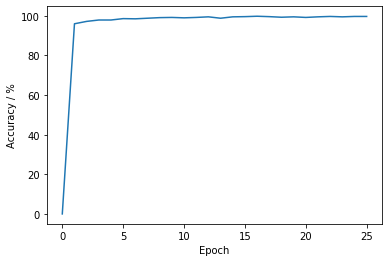

In [2]:
import matplotlib.pyplot as plt
results = [0.0, 96.0, 97.2, 97.9, 97.9, 98.6, 98.5, 98.8, 99.1, 99.2, 99.0, 99.2, 99.5, 98.8, 99.5, 99.6, 99.8, 99.6, 99.3, 99.5, 99.2, 99.5, 99.7, 99.5, 99.7, 99.7 ]
plt.plot(results)
plt.xlabel('Epoch')
plt.ylabel('Accuracy / %')

## Droupout Layer

## Convelutional Neural Network